### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

### Importing DataSet and gaining some Information

In [3]:
dataset = pd.read_csv("Patches.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   Elevation  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      3                               258   
1       2590      2                               212   
2       2804      9                               268   
3       2785     18                               242   
4       2595      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Horizontal_Distance_To_Fire_Points   Tree  
0                                6279  Other  
1                                6225  Other  
2                                6121  Other  
3                                6211  Other  
4

### Converting Categorical Data into Numeric

In [4]:
dataset['Tree'] = dataset['Tree'].map({'Spruce':1, 'Other':0})

### Correlation and Causation

In [5]:
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')


'corrheatmap.html'

In [6]:
X = dataset

### Converter

In [7]:
# Defining if slope was high or low
def converter(column):
    if column <= 16.50:
        return 1 # Low
    else:
        return 0 # High


### Applying the Converter

In [8]:
X['Slope'] = X['Slope'].apply(converter)
print(X.head())
print(X.info())


   Elevation  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      1                               258   
1       2590      1                               212   
2       2804      1                               268   
3       2785      0                               242   
4       2595      1                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Horizontal_Distance_To_Fire_Points  Tree  
0                                6279     0  
1                                6225     0  
2                                6121     0  
3                                6211     0  
4     

### Dividing into Subsets

In [9]:
# Dividing data into subsets
subset1 = X[['Slope','Elevation','Tree']]

### Normalizing the numeric variables of subsets

In [10]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)

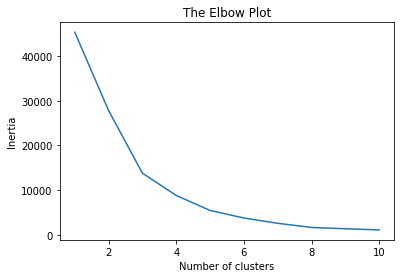

In [11]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### T-SNE

In [13]:

# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =35,n_iter=2500)
x_tsne = tsne.fit_transform(X1)

Elevation = list(X['Elevation'])
Slope = list(dataset['Slope'])
Tree = list(dataset['Tree'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Slope:{a}, Elevation: {b},Tree: {c}' for a,b,c in list(zip(Slope,Elevation,Tree))],
                                hoverinfo='text')]
layout = go.Layout(title = 't-SNE Dimensionality Reduction 2500_35_iteration_2_SlopeElevationVertical_Distance_To_Hydrology', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE.html')


't-SNE.html'